# This is a work in progress, to be continued.


- data types: The data hierarchy, the concrete vs. abstract types

- struct: composite types; used to organize data and give them types

- method and multiple dispatch: how to do things depend on data types




## Data Types

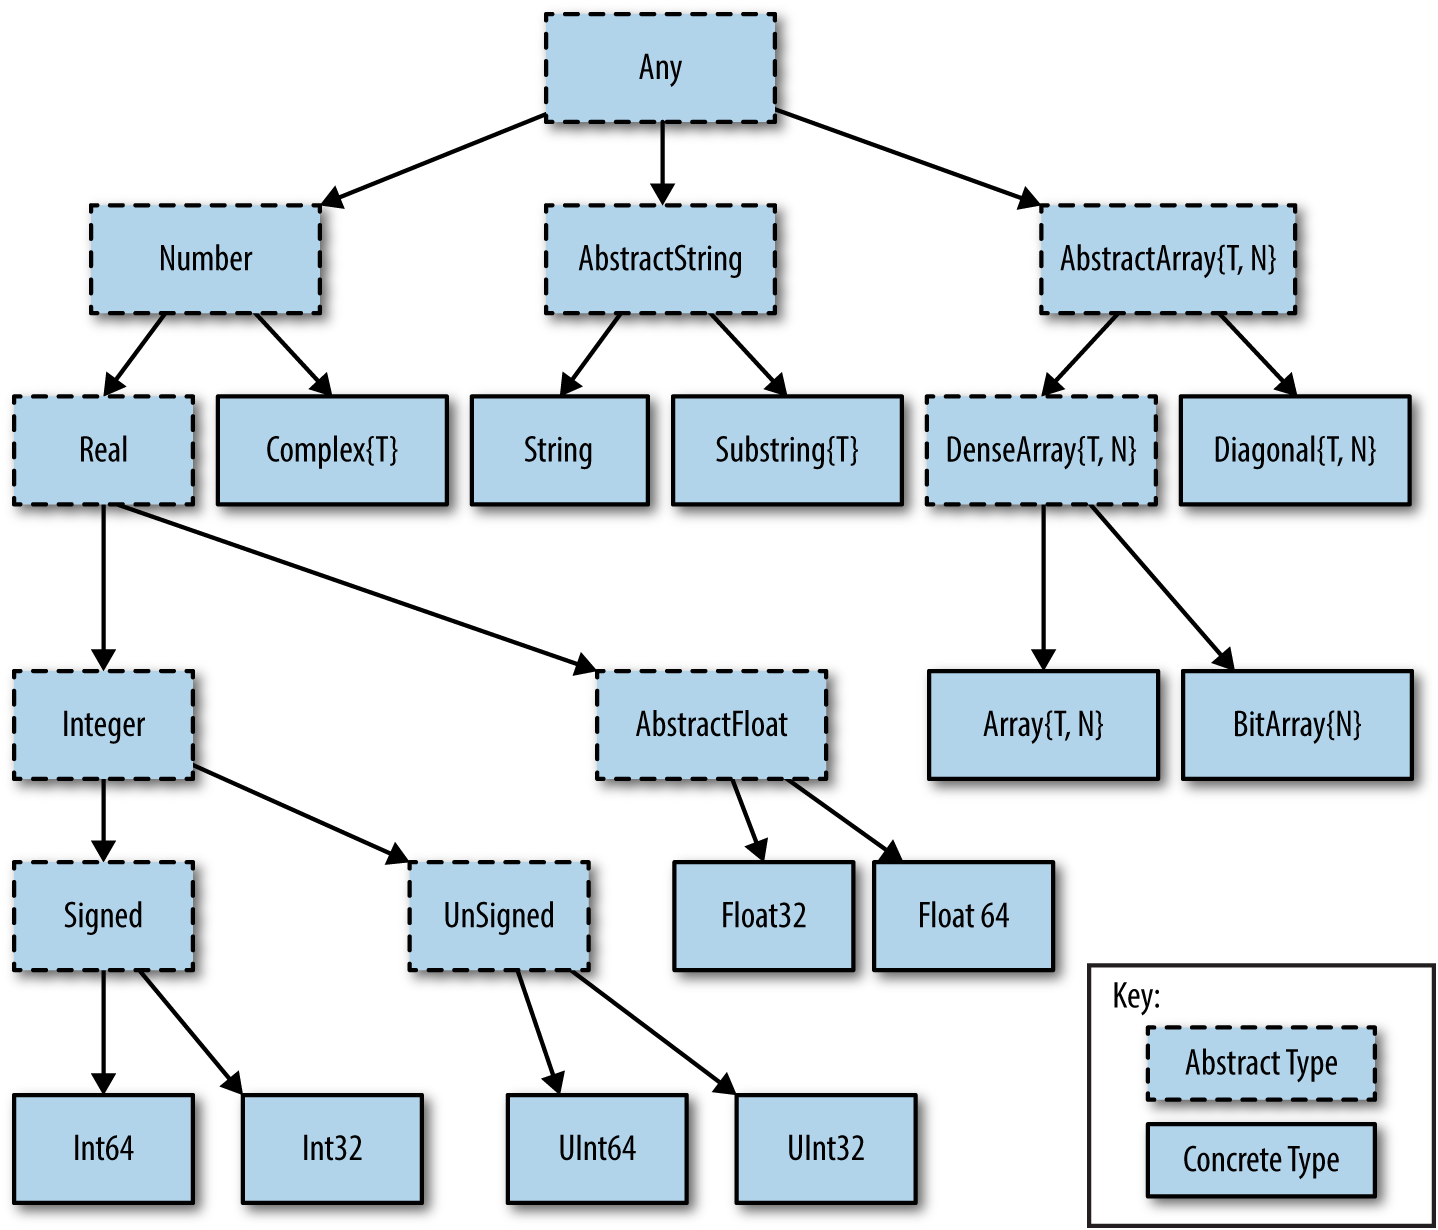

## `struct`

In [1]:
## Examples of "struct" ("types", "classes", for structured data)
##   Organize data, give them certain types.


struct theSimplest  # accept any type, string, Float64, Int64, etc.
    x               # very flexible, but the comiled code is less efficient  
    y
end

aa = theSimplest(1.2, "haha")

@show typeof(aa.x);
@show aa.x;

@show typeof(aa.y);
@show aa.y;    

typeof(aa.x) = Float64
aa.x = 1.2
typeof(aa.y) = String
aa.y = "haha"


In [2]:
struct test{T} <: Real  # "<: Real" means the whole struct would be a sub-type of Real
    ss::T                # test1{T}: "T" could be any type (Float64, Int64, etc.).
    pp::T                # ss and pp have the same type. E.g, both are Float64, etc.  
end


struct register{S1, S2}  # Does not need not be "T", could be any such as S. 
    學校::S1             # Allow each field to have different types. 可加身高。
    姓名::S2             # flexible, and the compiled code is more efficient than the Simplest
end


struct example    # Mixed types. This does not work: struct example
    x1::Float64   #                                          x1::T   
    y1::Int64     #                                          y1::T
end               #                                   end     

struct register2   # work exactly the same as "register"
    學校          
    姓名
end

In [3]:
aa = test(2.2, 1.0)  # show also: (3,2) (integer), ("yes", "no") (string)

@show typeof(aa);
@show typeof(aa.ss);  # call the value by the field name
@show aa.ss;
@show typeof(aa.pp);  # call the value by the field name
@show aa.pp;

bb = test("string also work, ", "that's great")
println("")
@show bb;
@show typeof(bb.ss);
@show bb.ss;

# cc = test(2.2, 1)  # why this does not work? Because the _____ are of different ____


typeof(aa) = test{Float64}
typeof(aa.ss) = Float64
aa.ss = 2.2
typeof(aa.pp) = Float64
aa.pp = 1.0

bb = test{String}("string also work, ", "that's great")
typeof(bb.ss) = String
bb.ss = "string also work, "


In [4]:
aa = register("台大", "王大華")
bb = register("政大", "鄭中化")
cc = register(101,    "李小花")
@show aa;
@show typeof(aa.學校);
@show aa.學校;

&&&stop_here_for_a_moment

namelist = (aa, bb, cc)

for i in 1:length(namelist)
    display(namelist[i].學校)
end

aa = register{String, String}("台大", "王大華")
typeof(aa.學校) = String
aa.學校 = "台大"


LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://E:/ajen/TEACHING/Taiwan/00 NumericalMethods/00mynotes/In[4]#8:1\[90mIn[4]:8:1[0;0m]8;;\

[48;2;120;70;70m&&[0;0m&stop_here_for_a_moment
[90m└┘ ── [0;0m[91minvalid identifier[0;0m

In [5]:
struct test5{Float64}
    ss::Float64
end

@show aa = test5(1.1);
@show typeof(aa);


struct test6b{Float64} # does not work
    ss
end

# @show aa = test6b(1.1) # does not work


struct test7{Float64}  # does not work
    ss::Int64
end

# @show aa = test7(1)     # does not work
# @show aa = test7(1.1)   # does not work

struct test8
    ss::Float64
end

@show bb = test8(1.2);
@show typeof(bb);

struct test9{Float64}
    ss::Float64
end

@show cc = test9(1.2);
@show typeof(cc);

@show typeof(1.2);

struct test10{T} 
    ss::T
end

dd = test10(10);
ee = test10(1.0);

@show typeof(dd);
@show typeof(ee);

aa = test5(1.1) = test5{Float64}(1.1)
typeof(aa) = test5{Float64}
bb = test8(1.2) = test8(1.2)
typeof(bb) = test8
cc = test9(1.2) = test9{Float64}(1.2)
typeof(cc) = test9{Float64}
typeof(1.2) = Float64
typeof(dd) = test10{Int64}
typeof(ee) = test10{Float64}


## Methods: The ways that Julia do things; often depend on data types.

Do you know that the simple arithmetic of `1.0 + 1.0` and `1.0 + 1` are treated differently in Julia? It is because the former is the sum of two `double`s while the latter is the sum of a `double` and an `integer`. They require different computer codes (i.e., different _**methods**_) to do the job. Which method to use often depends on the types of the data, such as `Float64`, `Int64`, or any user-defined types.

If you define your own types of data, you can also define the methods on how they should work in arithmetic.

`struct` is a good way to define your own data type, as we have seen above.

In [6]:
methods(+)

# 189 methods for generic function "+" from Base:
   [1] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\periods.jl:334
   [2] +(x::Dates.CompoundPeriod, y::Dates.TimeType)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\periods.jl:362
   [3] +(x::Dates.CompoundPeriod, y::Dates.Period)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\periods.jl:332
   [4] +(x::Bool, z::Complex{Bool})
     @ complex.jl:305
   [5] +(x::Bool, y::Bool)
     @ bool.jl:166
   [6] +(x::Bool)
     @ bool.jl:163
   [7] +(x::Bool, z::Complex)
     @ complex.jl:312
   [8] +(x::Real, z::Complex{Bool})
     @ complex.jl:319
   [9] +(x::Bool, y::T) where T<:AbstractFloat
     @ bool.jl:173
  [10] +(x::Dates.DateTime, y::Dates.Quarter)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:77
  [11] +(dt::Dates.DateTime, z::Dates.Month)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:49
  [12] +(dt::Dates.DateTime, y::Dates.Year)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:25
  [13] +(x::Dates.DateTime, y::Dates.Period)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:83
  [14] +(a::Pkg.Resolve.FieldValue, b::Pkg.Resolve.FieldValue)
     @ Pkg.Resolve C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Pkg\src\Resolve\fieldvalues.jl:43
  [15] +(z::Complex{Bool}, x::Bool)
     @ complex.jl:306
  [16] +(z::Complex{Bool}, x::Real)
     @ complex.jl:320
  [17] +(z::Complex, x::Bool)
     @ complex.jl:313
  [18] +(::Missing, ::Missing)
     @ missing.jl:122
  [19] +(::Missing)
     @ missing.jl:101
  [20] +(x::Missing, y::Dates.AbstractTime)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:91
  [21] +(::Missing, ::Number)
     @ missing.jl:123
  [22] +(level::Base.CoreLogging.LogLevel, inc::Integer)
     @ Base.CoreLogging logging.jl:131
  [23] +(x::Dates.Date, y::Dates.Day)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:81
  [24] +(x::Dates.Date, y::Dates.Week)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:79
  [25] +(x::Dates.Date, y::Dates.Quarter)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:75
  [26] +(dt::Dates.Date, z::Dates.Month)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:56
  [27] +(dt::Dates.Date, y::Dates.Year)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:29
  [28] +(dt::Dates.Date, t::Dates.Time)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:21
  [29] +(t::Dates.Time, dt::Dates.Date)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:22
  [30] +(x::Dates.Time, y::Dates.TimePeriod)
     @ Dates C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Dates\src\arithmetic.jl:85
  [31] +(x::Rational{BigInt}, y::Rational{BigInt})
     @ Base.GMP.MPQ gmp.jl:1061
  [32] +(a::Pkg.Resolve.VersionWeight, b::Pkg.Resolve.VersionWeight)
     @ Pkg.Resolve C:\Users\mymis\.julia\juliaup\julia-1.10.0+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Pkg\src\Resolve\versionweights.jl:22
  [3